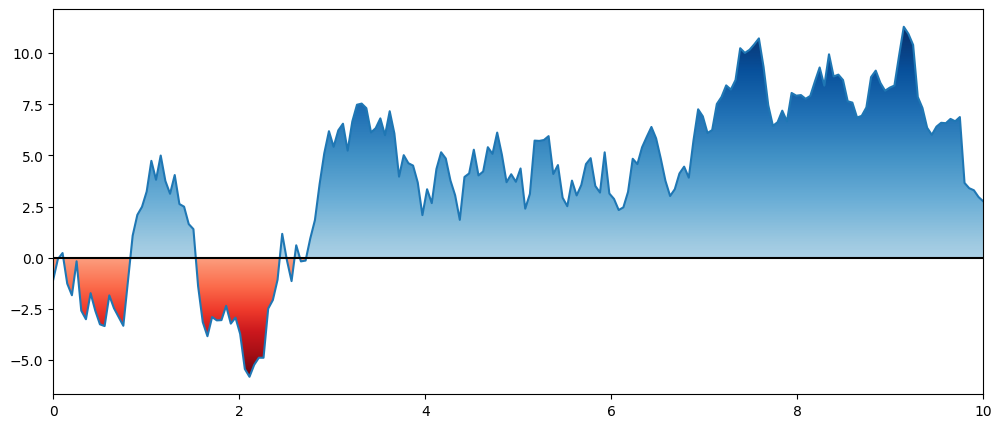

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
x = np.linspace(0, 10, 200)
y = np.random.normal(0.01, 1, 200).cumsum()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x, y)

ylim = ax.get_ylim()

grad1 = ax.imshow(np.linspace(0, 1, 256).reshape(-1, 1), cmap='Blues', vmin=-0.5, aspect='auto',
                  extent=[x.min(), x.max(), 0, y.max()], origin='lower')
poly_pos = ax.fill_between(x, y.min(), y, alpha=0.1)
grad1.set_clip_path(poly_pos.get_paths()[0], transform=ax.transData)
poly_pos.remove()

grad2 = ax.imshow(np.linspace(0, 1, 256).reshape(-1, 1), cmap='Reds', vmin=-0.5, aspect='auto',
                  extent=[x.min(), x.max(), y.min(), 0], origin='upper')
poly_neg = ax.fill_between(x, y, y.max(), alpha=0.1)
grad2.set_clip_path(poly_neg.get_paths()[0], transform=ax.transData)
poly_neg.remove()

ax.set_ylim(ylim)
ax.axhline(0, color='black')  # show a line at x=0
plt.show()


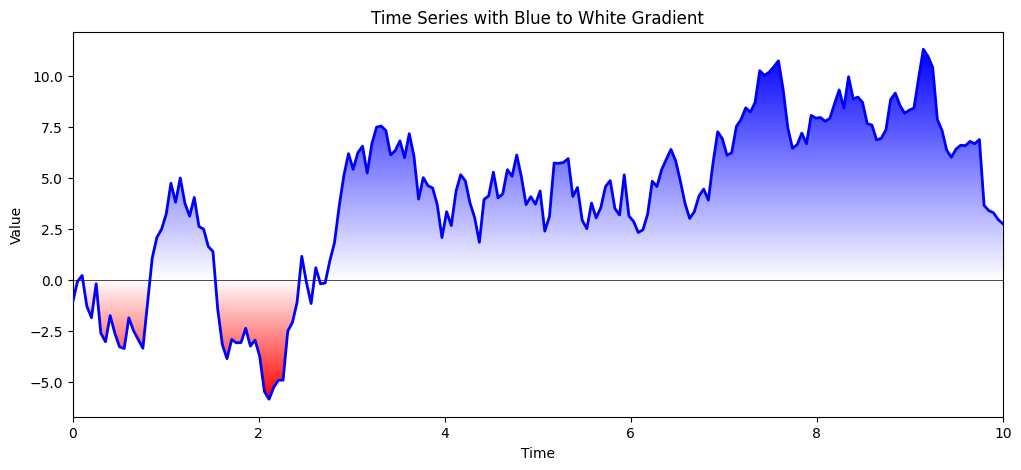

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(123)
x = np.linspace(0, 10, 200)
y = np.random.normal(0.01, 1, 200).cumsum()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x, y, color='blue', zorder=3, linewidth=2)

ylim = ax.get_ylim()

# Create custom colormaps
def create_custom_cmap(color):
    return LinearSegmentedColormap.from_list("custom", [color, 'white'], N=256)

custom_blues = create_custom_cmap('blue')
custom_reds = create_custom_cmap('red')

grad1 = ax.imshow(np.linspace(1, 0, 256).reshape(-1, 1), cmap=custom_blues, vmin=0, vmax=1, aspect='auto',
                  extent=[x.min(), x.max(), 0, y.max()], origin='lower')
poly_pos = ax.fill_between(x, y.min(), y, alpha=0.3)
grad1.set_clip_path(poly_pos.get_paths()[0], transform=ax.transData)
poly_pos.remove()

grad2 = ax.imshow(np.linspace(1, 0, 256).reshape(-1, 1), cmap=custom_reds, vmin=0, vmax=1, aspect='auto',
                  extent=[x.min(), x.max(), y.min(), 0], origin='upper')
poly_neg = ax.fill_between(x, y, y.max(), alpha=0.3)
grad2.set_clip_path(poly_neg.get_paths()[0], transform=ax.transData)
poly_neg.remove()

ax.set_ylim(ylim)
ax.axhline(0, color='black', linewidth=0.5)  # show a line at y=0
ax.set_title('Time Series with Blue to White Gradient')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
plt.show()


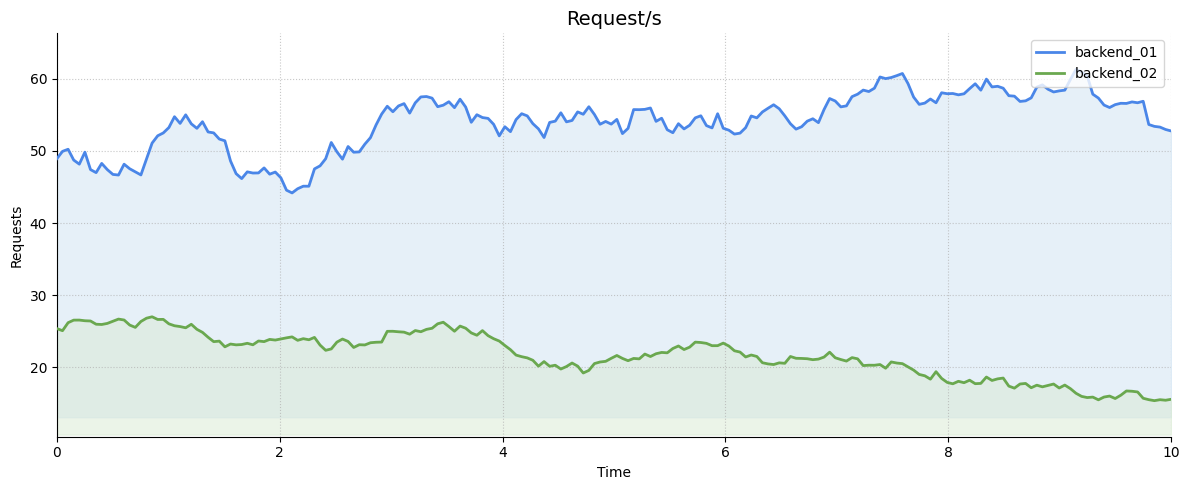

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(123)
x = np.linspace(0, 10, 200)
y1 = np.random.normal(0.01, 1, 200).cumsum() + 50  # Blue line
y2 = np.random.normal(0.01, 0.5, 200).cumsum() + 25  # Green line

fig, ax = plt.subplots(figsize=(12, 5))

# Create custom colormaps
blue_cmap = LinearSegmentedColormap.from_list("custom", ['#4a86e8', '#cfe2f3'])
green_cmap = LinearSegmentedColormap.from_list("custom", ['#6aa84f', '#d9ead3'])

# Plot lines and gradients
ax.plot(x, y1, color='#4a86e8', zorder=3, linewidth=2)
ax.plot(x, y2, color='#6aa84f', zorder=3, linewidth=2)

# Create gradient effect
ax.fill_between(x, y1, ax.get_ylim()[0], color='#cfe2f3', alpha=0.5, zorder=1)
ax.fill_between(x, y2, ax.get_ylim()[0], color='#d9ead3', alpha=0.5, zorder=1)

# Customize the plot
ax.set_ylim(min(min(y1), min(y2)) - 5, max(max(y1), max(y2)) + 5)
ax.set_xlim(x.min(), x.max())
ax.set_title('Request/s', fontsize=14)
ax.set_xlabel('Time')
ax.set_ylabel('Requests')
ax.grid(True, linestyle=':', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
ax.legend(['backend_01', 'backend_02'], loc='upper right')

# Adjust layout and display
plt.tight_layout()
plt.show()


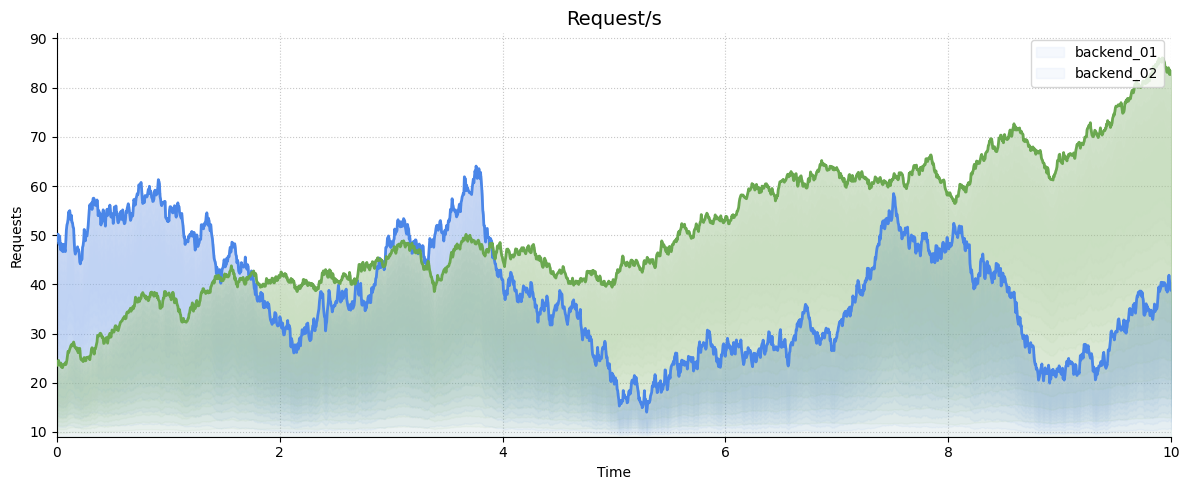

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(123)
x = np.linspace(0, 10, 2000)
y1 = np.random.normal(0.01, 1, 2000).cumsum() + 50  # Blue line
y2 = np.random.normal(0.01, 0.5, 2000).cumsum() + 25  # Green line

fig, ax = plt.subplots(figsize=(12, 5))

# Create custom colormaps for the umbra effect
def create_umbra_cmap(color, name):
    return LinearSegmentedColormap.from_list(name, [color, 'white'], N=256)

blue_cmap = create_umbra_cmap('#4a86e8', 'blue_umbra')
green_cmap = create_umbra_cmap('#6aa84f', 'green_umbra')

# Create umbra effect
for line, cmap, color in zip([y1, y2], [blue_cmap, green_cmap], ['#4a86e8', '#6aa84f']):
    ymin = min(y1.min(), y2.min()) - 5  # Extend 5 units below the minimum of both lines

    # Create gradient
    levels = np.linspace(0, 1, 20)
    for level in levels:
        ax.fill_between(x, ymin + (line - ymin) * level, line,
                        color=cmap(level), alpha=0.05, zorder=2)

# Plot lines on top
ax.plot(x, y1, color='#4a86e8', zorder=3, linewidth=2)
ax.plot(x, y2, color='#6aa84f', zorder=3, linewidth=2)

# Customize the plot
ax.set_ylim(min(y1.min(), y2.min()) - 5, max(max(y1), max(y2)) + 5)
ax.set_xlim(x.min(), x.max())
ax.set_title('Request/s', fontsize=14)
ax.set_xlabel('Time')
ax.set_ylabel('Requests')
ax.grid(True, linestyle=':', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
ax.legend(['backend_01', 'backend_02'], loc='upper right')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import stats

class ConfidenceIntervalVisualizer:
    def __init__(self):
        # Parameters
        self.population_mean = 100
        self.population_std = 15
        self.max_samples = 200

        # Generate population
        np.random.seed(42)
        self.population = np.random.normal(self.population_mean,
                                         self.population_std, 10000)

        # Storage for tracking
        self.samples = []
        self.means = []
        self.intervals = []

    def create_animation(self):
        fig = plt.figure(figsize=(12, 8))

        # Create subplots
        gs = fig.add_gridspec(2, 2)
        ax_count = fig.add_subplot(gs[0, 0])    # Sample count
        ax_mean = fig.add_subplot(gs[0, 1])     # Current mean
        ax_main = fig.add_subplot(gs[1, :])     # Main visualization

        def animate(frame):
            # Clear axes
            for ax in [ax_count, ax_mean, ax_main]:
                ax.clear()

            # Draw new sample
            new_sample = np.random.choice(self.population, size=30)
            self.samples.append(new_sample)

            # Calculate statistics
            current_mean = np.mean(new_sample)
            self.means.append(current_mean)

            # Calculate confidence interval
            confidence = 0.95
            degrees_of_freedom = len(new_sample) - 1
            t_value = stats.t.ppf((1 + confidence) / 2, degrees_of_freedom)
            standard_error = stats.sem(new_sample)
            margin_of_error = t_value * standard_error
            ci = (current_mean - margin_of_error, current_mean + margin_of_error)
            self.intervals.append(ci)

            # Plot 1: Sample Count
            ax_count.text(0.5, 0.5, f"Samples: {len(self.samples)}",
                         ha='center', va='center', fontsize=20)
            ax_count.axis('off')

            # Plot 2: Current Mean
            ax_mean.text(0.5, 0.5,
                        f"Current Mean:\n{current_mean:.2f}",
                        ha='center', va='center', fontsize=20)
            ax_mean.axis('off')

            # Plot 3: Main Visualization
            # Plot confidence intervals
            for i, (mean, interval) in enumerate(zip(self.means, self.intervals)):
                ax_main.plot([i, i], interval, 'b-', alpha=0.1)

            # Plot means
            ax_main.plot(self.means, 'bo-', label='Sample Means', alpha=0.5)

            # Plot true population mean
            ax_main.axhline(y=self.population_mean, color='r',
                          linestyle='--', label='True Mean')

            # Calculate coverage
            coverage = sum([ci[0] <= self.population_mean <= ci[1]
                          for ci in self.intervals]) / len(self.intervals)

            # Add text box with statistics
            stats_text = (f'Coverage: {coverage:.1%}\n'
                         f'Mean Width: {np.mean([i[1]-i[0] for i in self.intervals]):.2f}')
            ax_main.text(0.02, 0.98, stats_text,
                        transform=ax_main.transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            # Customize main plot
            ax_main.set_title('Confidence Intervals Over Time')
            ax_main.set_xlabel('Sample Number')
            ax_main.set_ylabel('Value')
            ax_main.legend()

            # Set y-limits to focus on relevant range
            if self.intervals:
                y_min = min([ci[0] for ci in self.intervals])
                y_max = max([ci[1] for ci in self.intervals])
                margin = (y_max - y_min) * 0.1
                ax_main.set_ylim(y_min - margin, y_max + margin)

            plt.tight_layout()

            # Return the artists that were modified
            return ax_count, ax_mean, ax_main

        anim = FuncAnimation(fig, animate,
                           frames=self.max_samples,
                           interval=100,
                           blit=False,
                           repeat=False)
        return anim

# Create and save animation
visualizer = ConfidenceIntervalVisualizer()
anim = visualizer.create_animation()
anim.save('confidence_intervals.gif', writer='pillow', fps=10)
plt.close()


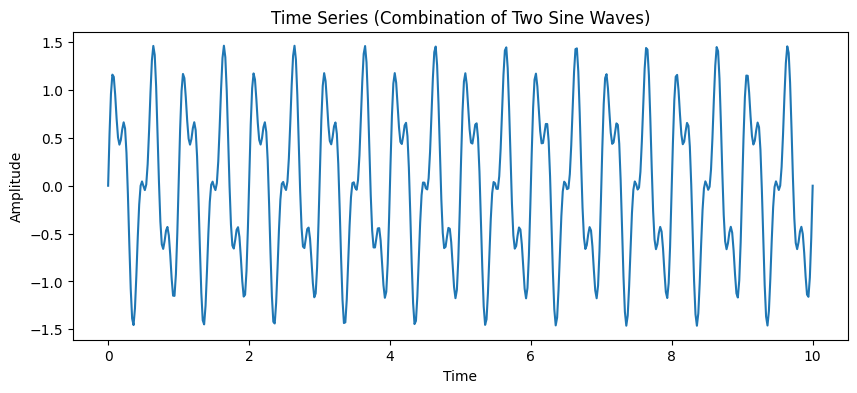

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time series with two frequencies
np.random.seed(42)
time = np.linspace(0, 10, 500)  # 500 time points
freq1, freq2 = 2, 5  # Frequencies in Hz
signal = np.sin(2 * np.pi * freq1 * time) + 0.5 * np.sin(2 * np.pi * freq2 * time)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time, signal)
plt.title("Time Series (Combination of Two Sine Waves)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig('time_series.png')
plt.show()

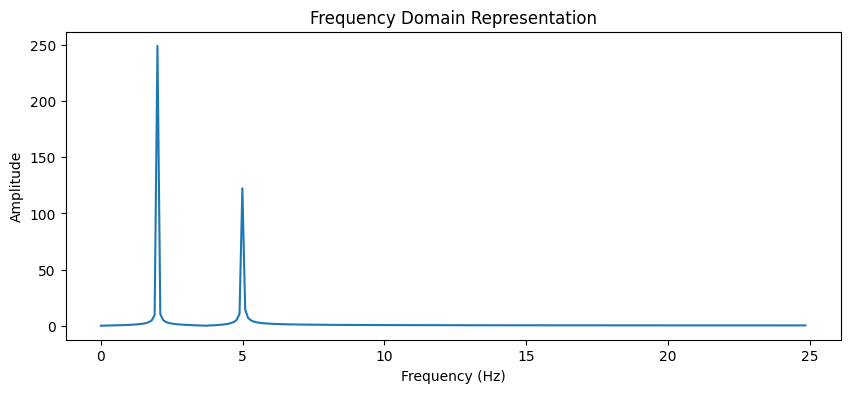

In [5]:
# Apply Fourier Transform
fft_result = np.fft.fft(signal)

# Frequency axis
frequencies = np.fft.fftfreq(len(fft_result), d=(time[1] - time[0]))

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(fft_result)//2])
plt.title("Frequency Domain Representation")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.savefig('time_series_amp.png')
plt.show()

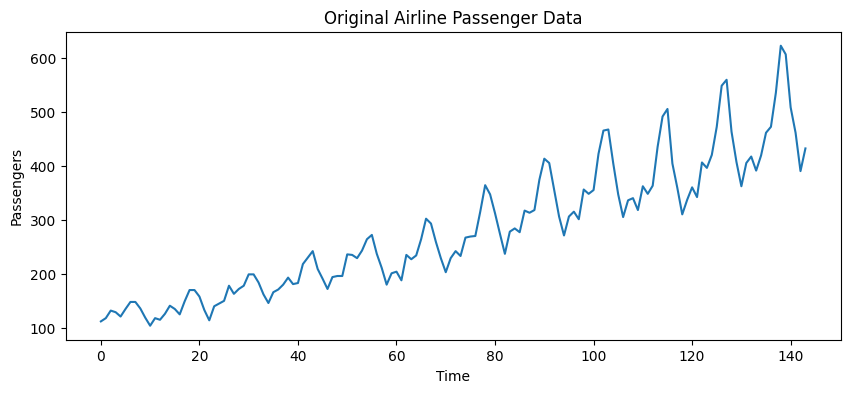

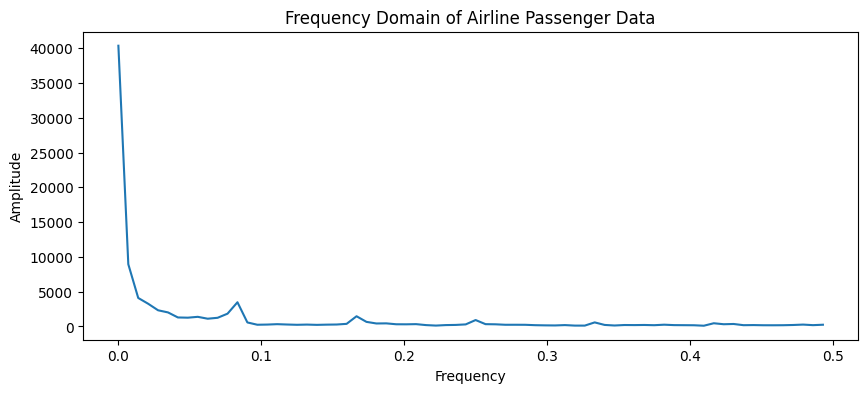

In [8]:
from sktime.datasets import load_airline

# Load the Airline Passengers Dataset
y = load_airline()
y = y.values

# Apply Fourier Transform
fft_result = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(fft_result), d=1)  # Assume monthly data (d=1)

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title("Original Airline Passenger Data")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

# Plot the frequency domain
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(fft_result)//2])
plt.title("Frequency Domain of Airline Passenger Data")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.savefig('time_series_passanger.png')
plt.show()

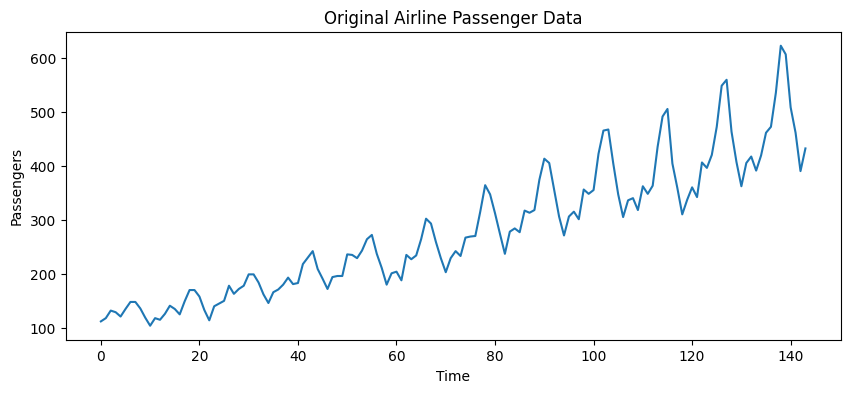

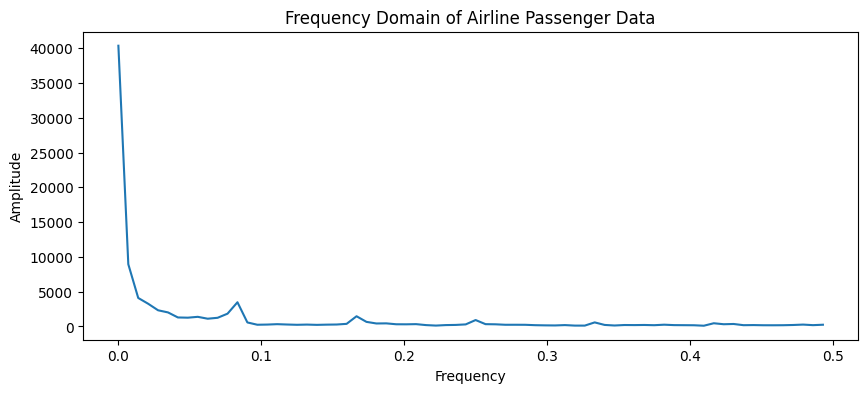

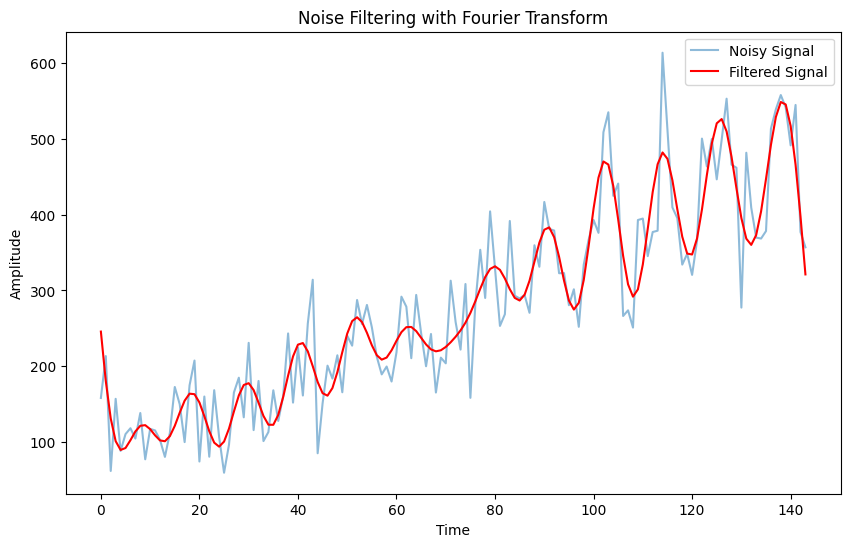

In [10]:
from sktime.datasets import load_airline
import numpy as np
import matplotlib.pyplot as plt

# Load the Airline Passengers Dataset
y = load_airline()
y = y.values

# Create time array
time = np.arange(len(y))

# Apply Fourier Transform
fft_result = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(fft_result), d=1)  # Assume monthly data (d=1)

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title("Original Airline Passenger Data")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

# Plot the frequency domain
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(fft_result)//2])
plt.title("Frequency Domain of Airline Passenger Data")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.savefig('time_series_passanger.png')
plt.show()

# Add random noise to the signal
noisy_signal = y + np.random.normal(0, 50, len(y))

# Apply Fourier Transform to noisy signal
fft_result_noisy = np.fft.fft(noisy_signal)

# Filter out high frequencies
fft_filtered = fft_result_noisy.copy()
threshold = 0.1  # Adjust this threshold as needed
fft_filtered[np.abs(frequencies) > threshold] = 0

# Inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(fft_filtered)

# Plot the original, noisy, and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(time, noisy_signal, label="Noisy Signal", alpha=0.5)
plt.plot(time, filtered_signal.real, label="Filtered Signal", color='red')
plt.title("Noise Filtering with Fourier Transform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig('time_series_passanger_amp.png')
plt.show()


<ipython-input-2-e6a380ef1dfd>:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X = torch.tensor([f for f in features], dtype=torch.float32)


Epoch [10/50], Loss: 1.0610
Epoch [20/50], Loss: 0.7659
Epoch [30/50], Loss: 0.4235
Epoch [40/50], Loss: 0.4078
Epoch [50/50], Loss: 0.3654


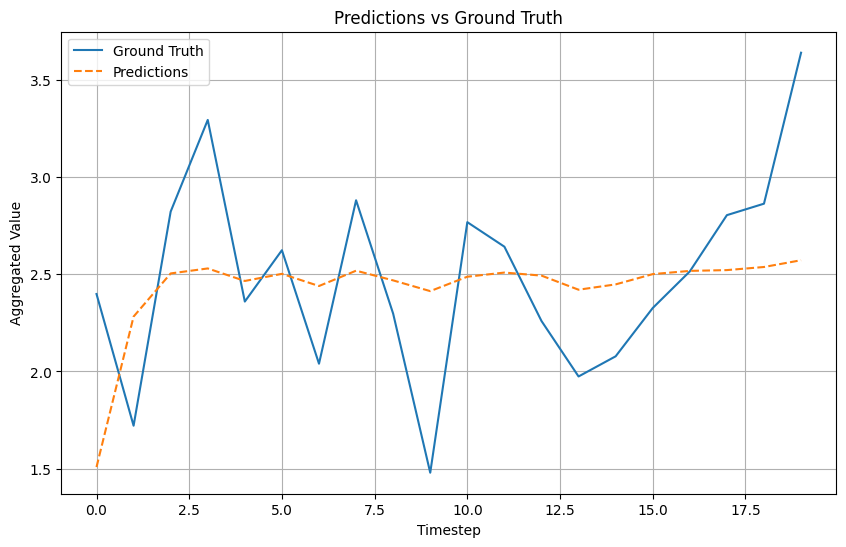

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)
torch.manual_seed(42)

# Parameters
n_nodes = 5
n_timesteps = 20
hidden_size = 16

# Generate data
features = [np.random.rand(n_nodes, 1) for _ in range(n_timesteps)]
targets = [f.sum(axis=0) for f in features]

# Convert to tensors
X = torch.tensor([f for f in features], dtype=torch.float32)
y = torch.tensor([t for t in targets], dtype=torch.float32)

# Model definition
class TemporalNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TemporalNN, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Reshape input: [timesteps, nodes, features] -> [1, timesteps, nodes]
        x = x.reshape(1, x.shape[0], -1)

        # Pass through GRU
        output, _ = self.gru(x)

        # Get predictions for each timestep
        predictions = self.linear(output.squeeze(0))
        return predictions

# Create model and define training parameters
model = TemporalNN(input_size=n_nodes, hidden_size=hidden_size, output_size=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Generate test data
test_features = [np.random.rand(n_nodes, 1) for _ in range(n_timesteps)]
test_targets = [f.sum(axis=0) for f in test_features]
test_X = torch.tensor([f for f in test_features], dtype=torch.float32)
test_y = torch.tensor([t for t in test_targets], dtype=torch.float32)

# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(test_X).numpy()
    targets = test_y.numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(targets, label='Ground Truth')
plt.plot(predictions, label='Predictions', linestyle='--')
plt.title('Predictions vs Ground Truth')
plt.xlabel('Timestep')
plt.ylabel('Aggregated Value')
plt.legend()
plt.grid(True)
plt.savefig('temporal_nn_predictions.png')
plt.show()


Epoch [10/50], Loss: 0.6303
Epoch [20/50], Loss: 0.4560
Epoch [30/50], Loss: 0.3452
Epoch [40/50], Loss: 0.2108
Epoch [50/50], Loss: 0.1887
Test Loss: 0.4701


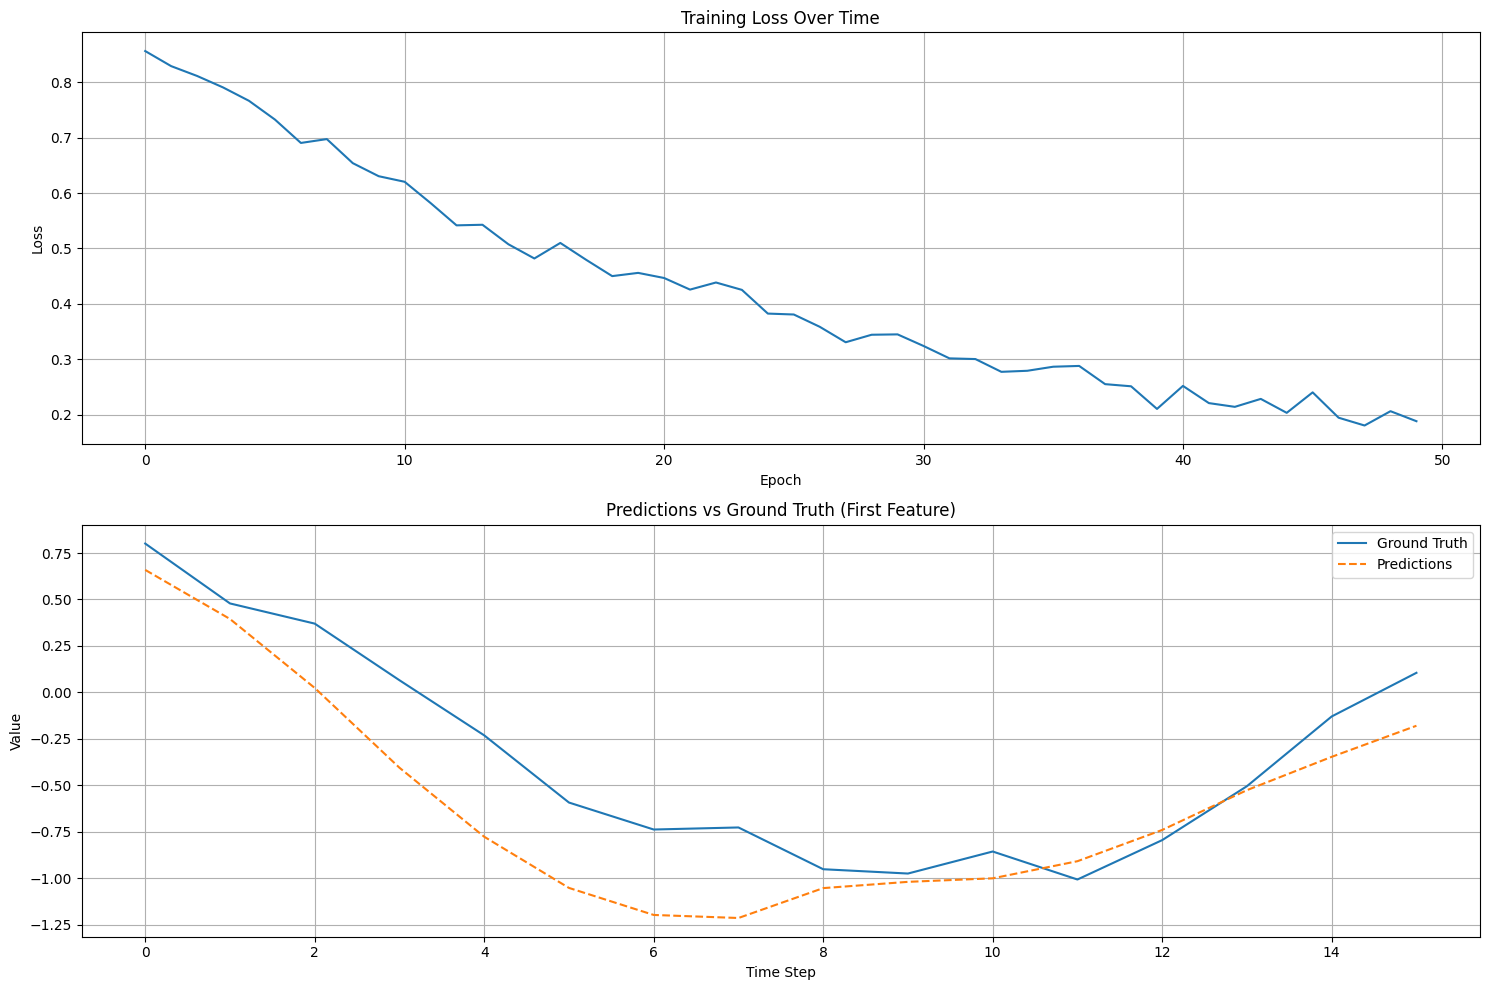

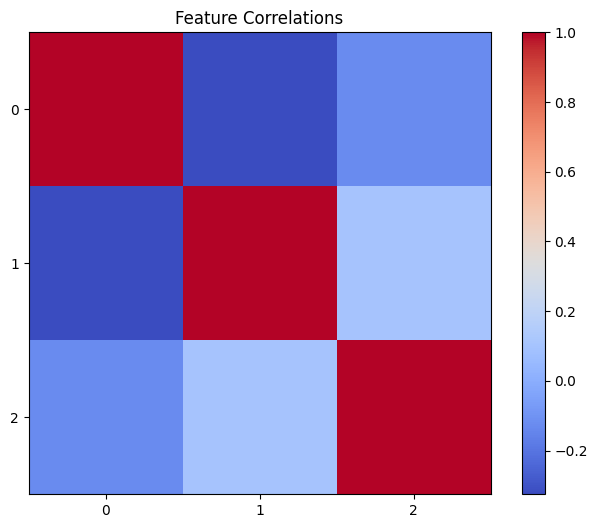

In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Set random seed
np.random.seed(42)
torch.manual_seed(42)

# Enhanced parameters
n_nodes = 10  # More nodes
n_timesteps = 100  # More timesteps
n_features = 3  # Multiple features per node
hidden_size = 32  # Larger hidden size
batch_size = 16
seq_length = 20  # Length of sequences for training

# Generate more complex synthetic data
def generate_complex_data(n_timesteps, n_nodes, n_features):
    data = np.zeros((n_timesteps, n_nodes, n_features))

    # Generate different patterns for each feature
    for feature in range(n_features):
        # Base trend
        trend = np.linspace(0, 1, n_timesteps)

        # Seasonal component (different frequency for each feature)
        seasonal = np.sin(2 * np.pi * (feature + 1) * np.linspace(0, 4, n_timesteps))

        # Random walk component
        random_walk = np.cumsum(np.random.normal(0, 0.1, n_timesteps))

        # Combine components
        base_signal = trend + seasonal + random_walk

        # Add different variations for each node
        for node in range(n_nodes):
            node_signal = base_signal + np.random.normal(0, 0.2, n_timesteps)
            data[:, node, feature] = node_signal

    return data

# Generate data
data = generate_complex_data(n_timesteps, n_nodes, n_features)

# Normalize data
scaler = StandardScaler()
data_reshaped = data.reshape(-1, n_features)
data_normalized = scaler.fit_transform(data_reshaped)
data = data_normalized.reshape(n_timesteps, n_nodes, n_features)

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length].mean(axis=0))  # Predict average node values
    return np.array(X), np.array(y)

X, y = create_sequences(data, seq_length)
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

# Split into train and test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Enhanced model with attention mechanism
class TemporalAttentionNN(nn.Module):
    def __init__(self, input_size, hidden_size, n_features):
        super(TemporalAttentionNN, self).__init__()
        self.hidden_size = hidden_size

        # GRU layers
        self.gru1 = nn.GRU(input_size * n_features, hidden_size,
                          batch_first=True, bidirectional=True)
        self.gru2 = nn.GRU(hidden_size * 2, hidden_size,
                          batch_first=True, bidirectional=True)

        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1)
        )

        # Output layers
        self.fc1 = nn.Linear(hidden_size * 2, hidden_size)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(hidden_size, n_features)

    def forward(self, x):
        # x shape: [batch, seq_len, nodes, features]
        batch_size, seq_len, n_nodes, n_features = x.size()

        # Reshape input for GRU
        x = x.reshape(batch_size, seq_len, -1)

        # First GRU layer
        gru1_out, _ = self.gru1(x)

        # Second GRU layer
        gru2_out, _ = self.gru2(gru1_out)

        # Attention mechanism
        attention_weights = self.attention(gru2_out)
        attention_weights = torch.softmax(attention_weights, dim=1)
        context_vector = torch.sum(attention_weights * gru2_out, dim=1)

        # Final prediction
        out = self.fc1(context_vector)
        out = torch.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)

        return out

# Create model and define training parameters
model = TemporalAttentionNN(input_size=n_nodes, hidden_size=hidden_size, n_features=n_features)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop with batches
def train_model(model, X_train, y_train, batch_size, epochs):
    train_losses = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        batch_count = 0

        # Create batches
        indices = torch.randperm(len(X_train))
        for start_idx in range(0, len(X_train), batch_size):
            batch_indices = indices[start_idx:start_idx + batch_size]
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            batch_count += 1

        avg_loss = total_loss / batch_count
        train_losses.append(avg_loss)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/50], Loss: {avg_loss:.4f}')

    return train_losses

# Train the model
train_losses = train_model(model, X_train, y_train, batch_size=batch_size, epochs=50)

# Evaluation
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting
plt.figure(figsize=(15, 10))

# Plot training loss
plt.subplot(2, 1, 1)
plt.plot(train_losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot predictions vs actual for the first feature
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 0].numpy(), label='Ground Truth')
plt.plot(test_predictions[:, 0].numpy(), label='Predictions', linestyle='--')
plt.title('Predictions vs Ground Truth (First Feature)')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('temporal_nn_complex_predictions.png')
plt.show()

# Plot feature correlations
feature_correlations = pd.DataFrame(data.reshape(-1, n_features)).corr()
plt.figure(figsize=(8, 6))
plt.imshow(feature_correlations, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(n_features))
plt.yticks(range(n_features))
plt.title('Feature Correlations')
plt.savefig('feature_correlations.png')
plt.show()
